<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/Estadistica/Datos_estadisticos_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando modulos necesarios

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.stats import gmean, hmean, trim_mean

#Se debe recordar que para la primera ejecución de este código, 
#se debe habilidar la instalación de 'pydataset'
#!pip install pydataset
from pydataset import data
faithful = data('faithful')


# Medidas Principales


## [Tendencia Central](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central)  y [Dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n) 

---
Una vez que ya nos dimos una buena idea visual de como se distribuyen los datos y de las relaciones que pueden existir entre los mismos, podemos pasar a calcular medidas numéricas propias de la estadística descriptiva. 

En general, suele ser interesante conocer cual puede ser el promedio o valor central al que tiende la distribución de nuestros datos, para esto se utilizan las medidas de tendencia central, entre las que podemos encontrar a:

   * La media aritmética (mean)
   
   $$ \sum \limits_{i=1}^{\infty}\frac{x_i}{n} $$
   
   
   * La media geométrica (geometric mean)
   
   $$\sqrt[n]{\prod_{i=1}^{\infty}x_{i}} $$
   
   * La media armónica (harmonic mean)
   
   $$(\sum \limits_{i=1}^{\infty}\frac{x_i^{-1}}{n})^{-1}$$
   
   * La mediana (median)
   
   $$\begin{cases}
  (X_\frac{n}{2})^{th}+({X_\frac{n}{2}}+1)^{th} & \text{if $n = even$} \\
  (X_\frac{n+1}{2})^{th} & \text{if $n = odd$}
\end{cases}
   $$
   
   * La media truncada (o trimedia; trimean)
   
   $$\frac{(Q_1 + (2*Q_2) + Q_3)}{4}$$
   
   
   * La moda (mode)
   

---------

Por un lado, la Media corresponde al punto de equilibrio que toma en cuenta la ubicación y el peso de cada dato. Mientras que la Mediana solo toma en cuenta la ubicación, correspondiendo al percentil 50, es decir, divide la muestra en dos grupos con igual cantidad de datos. Por otro lado, la Moda representa el punto de mayor concentración de datos en una muestra, pudiéndose incluso obtener varias modas.

--------

Nota: <font color="red">La **estadística robusta** es una aproximación alternativa a los métodos estadísticos clásicos. El objeto es producir estimadores que no sean afectados por variaciones pequeñas respecto a las hipótesis de los modelos.

Las estadísticas robustas intentan proporcionar métodos que emulan a los métodos clásicos, pero que no son afectados indebidamente por valores atípicos u otras pequeñas discrepancias respecto de las asunciones del modelo (Hasta un 40% sin verse afectados).</font>

![img](https://sites.google.com/site/estadisticalfrecuencia/_/rsrc/1474234535482/e/fgdfgdf/Capturacompzracion%20de%20ladmedias.PNG)

### Un ejemplo de media geométrica

Supongamos los resultados de una empresa. La empresa ha generado un 20% de rentabilidad el primer año, un 15% el segundo año, un 33% el tercer año y un 25% el cuarto año. Lo fácil, en este caso sería sumar las cantidades y dividir entre cuatro. Sin embargo esto no es correcto.

Para calcular la media de varios porcentajes debemos hacer uso de la media geométrica. Aplicado al caso anterior, tendríamos lo siguiente:

   $$Media geométrica = \sqrt[n]{1.20 * 1.15 * 1.33 * 1.25} $$
   
   $$Media geométrica = \sqrt[n]{2.29425} = 1.23 $$

El resultado es 1.23, que expresado en porcentaje es un 23%. Lo que quiere decir que en promedio, cada año la empresa ha ganado un 23%. Dicho de otra forma, si cada año hubiese ganado un 23%, hubiera ganado lo mismo que ganando un 20% el primer año, un 15% el segundo, un 33% el tercero y un 25% el último año.

NOTA: Si las rentabilidades fueran negativas, no se pondrían números negativos. Si la rentabilidad es del -20%, el número a multiplicar sería 0,80. Si la rentabilidad es del -5%, el número a multiplicar sería 0,95. En conclusión si las rentabilidades son positivas, a uno le sumamos el porcentaje en tanto por uno. Mientras que, si las rentabilidades o porcentajes son negativos, a 1 le restamos el porcentaje en tanto por uno.

### A continuación, veamos un ejemplo de la media armónica

Supongamos que una persona decide salir a correr 10km. Los primeros 2 km corre a 15 km/h, los siguiente 2km, a 17 km/h, los siguientes 2km, a 14 km/h, y los otros dos tramos de 2km, a 13 km/h y 12 km/h, respectivamente.

En este ejemplo, la media armónica se calcularía de la siguiente manera:

$$H = (\frac{5}{\frac{1}{15} + \frac{1}{17} + \frac{1}{14} + \frac{1}{13} + \frac{1}{12}})$$

$$H = (\frac{5}{0.0667 + 0.0588 + 0.0714 + 0.0769 + 0.0833})$$

$$H = (\frac{5}{0.3572}) = 13.9987$$

Veamos como podemos calcularlas con Python:

In [2]:
# media de variable eruptions
print(faithful['eruptions'].mean())

# mediana
print(faithful['eruptions'].median())

# moda
print(faithful['eruptions'].mode())

3.4877830882352936
4.0
0    1.867
1    4.500
Name: eruptions, dtype: float64


In [3]:
from scipy.stats import gmean 
# media geométrica
gmean(faithful['eruptions'])

3.2713131325361786

In [4]:
from scipy.stats import hmean 
# media armónica
hmean(faithful['eruptions'])

3.0389330499472607

In [5]:
from scipy.stats import trim_mean 
# media truncada, recortando el 10 superior e inferior
trim_mean(faithful['eruptions'], .10)

3.5298073394495413

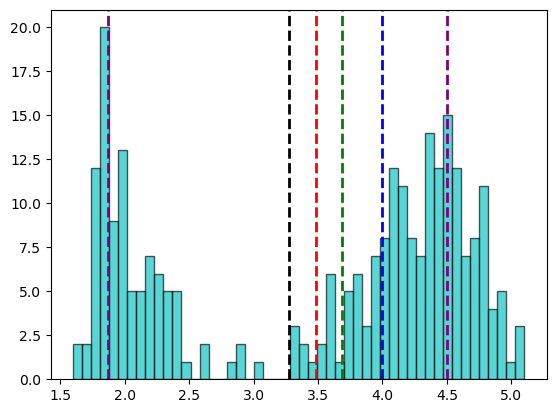

In [6]:
x = faithful['eruptions']
result = plt.hist(x, bins=50, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(trim_mean(x, .25), color='green', linestyle='dashed', linewidth=2)
plt.axvline(gmean(x), color='black', linestyle='dashed', linewidth=2)
plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=2)

a = x.mode().astype(float)
a1 = a[0]
a2 = a[1]

plt.axvline(a1, color='purple', linestyle='dashed', linewidth=2)
plt.axvline(a2, color='purple', linestyle='dashed', linewidth=2)

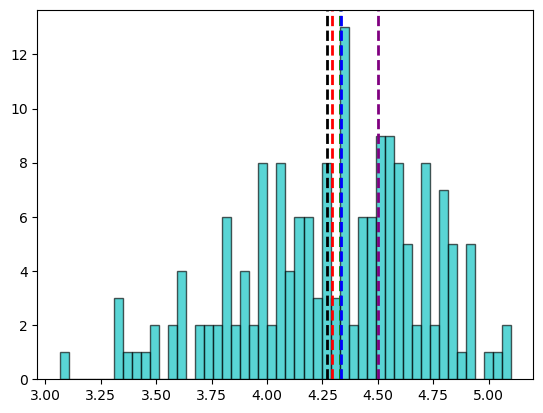

In [7]:
y = faithful[faithful['eruptions']>3.0]
x = y['eruptions']
result = plt.hist(x, bins=50, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(trim_mean(x, .25), color='green', linestyle='dashed', linewidth=2)
plt.axvline(gmean(x), color='black', linestyle='dashed', linewidth=2)
plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=2)

a = x.mode().astype(float)
a1 = a[0]

plt.axvline(a1, color='purple', linestyle='dashed', linewidth=2)

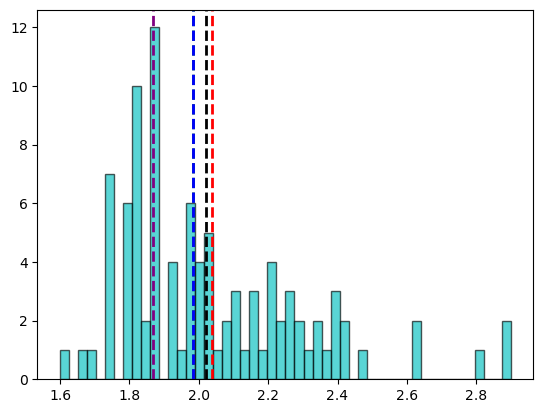

In [8]:
z = faithful[faithful['eruptions']<=3.0]
x = z['eruptions']
result = plt.hist(x, bins=50, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(trim_mean(x, .25), color='green', linestyle='dashed', linewidth=2)
plt.axvline(gmean(x), color='black', linestyle='dashed', linewidth=2)
plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=2)

a = x.mode().astype(float)
a1 = a[0]

plt.axvline(a1, color='purple', linestyle='dashed', linewidth=2)

## Medidas de dispersión

---
Las medidas de tendencia central no son las únicas medidas de resumen estadístico que podemos calcular; otras medidas también de gran importancia son las **medidas de dispersión**. 

Las medidas de dispersión, también llamadas medidas de variabilidad, muestran la variabilidad de una distribución, indicando por medio de un número si las diferentes puntuaciones de una variable están muy alejadas de la media. Cuanto mayor sea ese valor, mayor será la variabilidad, y cuanto menor sea, más homogénea será a la media.

---
Así se sabe si todos los casos son parecidos o varían mucho entre ellos. Las principales medidas de dispersión son:
   * Varianza (variance)
   
   $$ \sum \limits_{i=1}^{\infty}\frac{(x_i-\mu)^2}{N} $$
   
   * Desviación estándar (standard deviation)
   
   $$ \sqrt{\sum\limits_{i=1}^{\infty}\frac{(x_i-\bar{x})^2}{n-1}} $$
   
   * MAD (Desviación absoluta de la mediana; Median Absoulte Deviation)
   
   $$ median(|X_i - \bar{X}|)$$
   
   * Cuartiles (Quartile)
   
   $$\begin{cases}
  Lower Quartile (Q1) & \text{with $(N+1)*\frac{1}{4}$} \\
  Middle Quartile (Q2) & \text{with $(N+1)*\frac{2}{4}$} \\
  Upper Quartile (Q3) & \text{with $(N+1)*\frac{3}{4}$} 
\end{cases}
   $$
   
   * Covarianza (Covariance)
   
   $$ COV(x,y) = {\sum\limits_{i=1}^{\infty}\frac{(x_i-\bar{x})*(y_i-\bar{y})}{n-1}} $$
   
   * Coeficiente de correlación (Correlation coefficient)

    $$ r_{x,y} = \frac{\sum \limits_{i=1}^{\infty}(x_i-\bar{x})*(y_i-\bar{y})}{\sqrt{\sum \limits_{i=1}^{\infty}(x_i-\bar{x})^{2}*(y_i-\bar{y})^{2}}} $$

Veamos como se calculan:

In [9]:
# varianza de variable eruptions
print(faithful['eruptions'].var())

# desviacion estandar
print(faithful['eruptions'].std())

# mad
print(faithful['eruptions'].mad())

1.3027283328494672
1.1413712511052077
1.0422532439446375


In [10]:
# cuartiles
faithful['eruptions'].quantile([.25, .5, .75])

0.25    2.16275
0.50    4.00000
0.75    4.45425
Name: eruptions, dtype: float64

Un gráfico relacionado a los cuartiles y describe varias características importantes al mismo tiempo, tales como la dispersión y simetría es el **diagrama de caja**. 

Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Podemos utilizar la función boxplot de Seaborn para generarlo.

<AxesSubplot:xlabel='eruptions'>

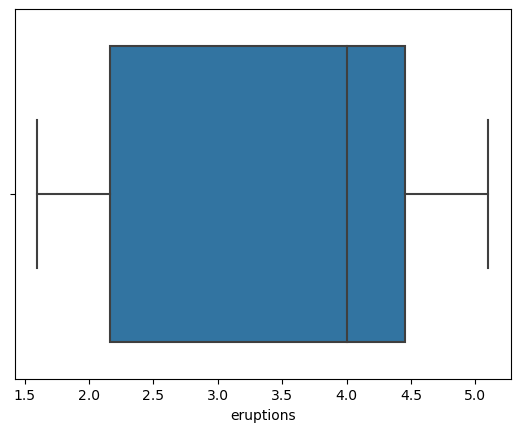

In [11]:
# diagrama de cajas
sns.boxplot(x = faithful['eruptions'])

<AxesSubplot:xlabel='eruptions'>

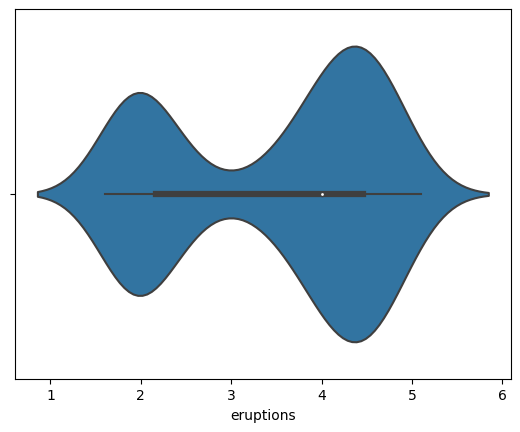

In [12]:
# diagrama de violin
sns.violinplot(x = faithful['eruptions'])

---
### [Covarianza](https://es.wikipedia.org/wiki/Covarianza)  
---

La covarianza indica el sentido de la correlación entre las variables; Si es mayor que cero la correlación es directa, en caso de ser menor, la correlación es inversa. La podemos calcular utilizando el método cov.

In [13]:
# covarianza
faithful.cov()

,eruptions,waiting
eruptions,1.302728,13.977808
waiting,13.977808,184.823312


### ¿Diferencia entre covarianza y correlación?

La covarianza y la correlación son muy útiles para comprender la relación entre dos variables continuas. La covarianza indica si ambas variables cambian en la misma dirección (covarianza positiva) o en dirección opuesta (covarianza negativa).

No hay importancia en el valor numérico de covarianza, solo el signo es útil. Mientras que la correlación explica sobre el cambio en una variable, indicando cuánto cambio de proporción hay con respecto a la segunda variable.

La correlación varía entre -1 a +1. Si el valor de correlación es 0, significa que no existe una relación lineal entre las variables, sin embargo, puede existir otra relación funcional.

--------

En el estudio de la covarianza sólo el signo importa. El valor positivo muestra que ambas variables varían en la misma dirección y el valor negativo muestra que varían en la dirección opuesta.

La covarianza entre dos variables x e y se puede calcular de la siguiente manera:

![img](https://sitiobigdata.com/wp-content/uploads/2019/10/Qu%C3%A9-es-Covarianza-y-correlaci%C3%B3n1.png)

Dónde:

    x̄ es la media muestral de x
    ȳ es la media muestral de y
    x_i e y_i son los valores de x e y para el i-ésimo dato en la muestra.
    n es el no. de datos en la muestra

### [Correlación](https://www.incibe-cert.es/blog/correlacion-herramientas-analisis-datos)  
---


El coeficiente de correlación oscila entre -1 y 1. 

**Los valores de r positivos indican una correlación positiva, en la que los valores de ambas variables tienden a incrementarse juntos**.

**Los valores de r negativos indican una correlación negativa, en la que los valores de una variable tienden a incrementarse mientras que los valores de la otra variable descienden**.

Un valor de 0 implica que no existe una correlación lineal entre las variables.

----------

**¿Cómo se utiliza el coeficiente de correlación?**

Para dos variables, la fórmula compara la distancia de cada dato puntual respecto a la media de la variable y utiliza esta comparación para decirnos hasta qué punto la relación entre las variables se ajusta a una línea imaginaria trazada entre los datos. A esto nos referimos cuando decimos que la correlación examina las relaciones lineales.

------------

**¿Qué limitaciones hay que tener en cuenta?**

La correlación sólo se refiere a las dos variables dadas y no aporta información sobre las relaciones más allá de los datos bivariados. Esta prueba no puede detectar valores atípicos en los datos (y por tanto <font color=red>estos sesgan los resultados</font>) y tampoco puede detectar correctamente las relaciones curvilíneas.

In [14]:
# coeficiente de correlación
faithful.corr(method="spearman")

,eruptions,waiting
eruptions,1.000000,0.777972
waiting,0.777972,1.000000


![img](https://www.jmp.com/es_co/statistics-knowledge-portal/what-is-correlation/correlation-coefficient/_jcr_content/par/styledcontainer_2069/par/image_9254.img.gif/1596641539725.gif)

## ¿Por qué es importante conocer las distribuciones?